
## Problem Statement :-
Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

Auto Insurance company is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering CLV as a parameter to classify loyal customers.

In [1]:
#Importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Customer_LifeTime_Value_Prediction/AutoInsurance.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Shape of dataset
df.shape

(9134, 24)

In [5]:
#Statistical Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#Columns of data
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
#Checking missing values in dataset
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
#We can see that there is no missing values in dataset

In [9]:
df.rename(columns={'Customer Lifetime Value': 'CLV'}, inplace= True)

In [10]:
#Numerical columns
numerical_cols = df.select_dtypes(['int64', 'float64'])

In [11]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [13]:
#Statistical summary of numerical columns
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## EDA

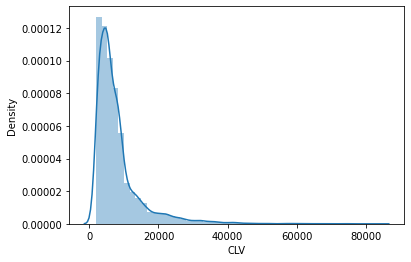

In [15]:
sns.distplot(df['CLV'])

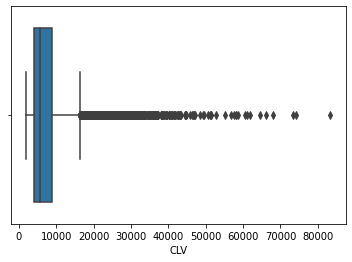

In [16]:
sns.boxplot(df['CLV'])

In [17]:
df['CLV'].skew()

3.032280259929985

- From the above distribution plot and boxplot of CLV , we can say that CLV is highly right skewed, There are lot of outliers in dependent variables but we can treat them directly because they are influential points.

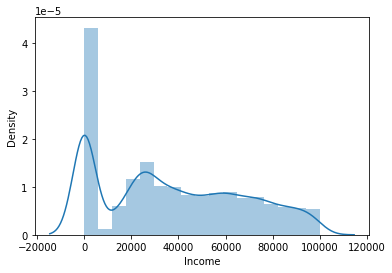

In [18]:
sns.distplot(df['Income'])

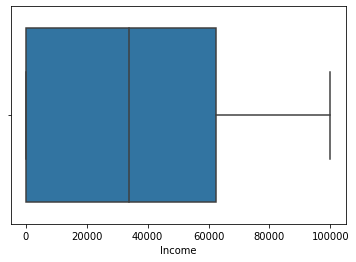

In [19]:
sns.boxplot(df['Income'])

##### Bivariate Analysis

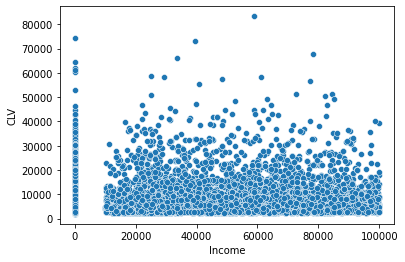

In [20]:
sns.scatterplot(df['Income'], df['CLV'])

- From the above plot we can say that there is no relationship between income and clv.

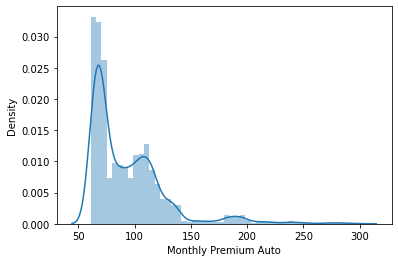

In [21]:
sns.distplot(df['Monthly Premium Auto'])

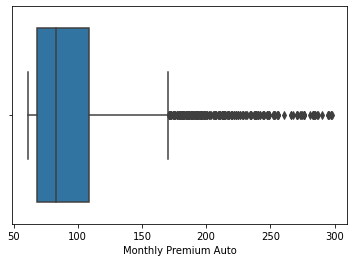

In [22]:
sns.boxplot(df['Monthly Premium Auto'])

- From the boxplot and distplot we can say that there is lot of outliers in Monthly Premium Auto feature.

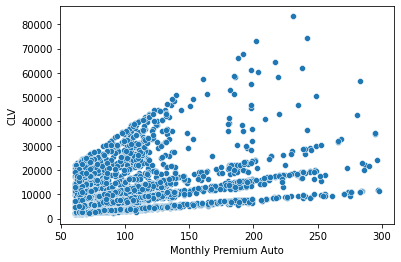

In [23]:
sns.scatterplot(df['Monthly Premium Auto'], df['CLV'])

- We can say that there is linear relationship between Monthly Premium Auto and CLV features

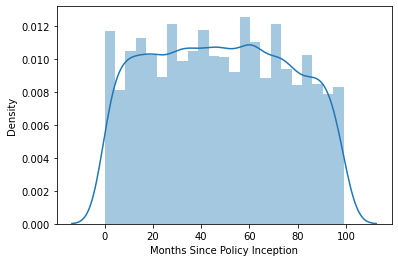

In [24]:
sns.distplot(df['Months Since Policy Inception'])

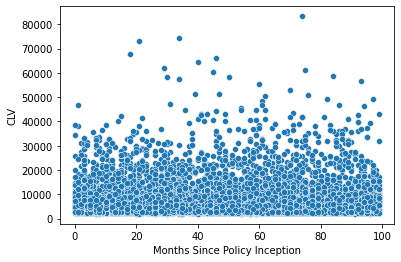

In [25]:
sns.scatterplot(df['Months Since Policy Inception'], df['CLV'])

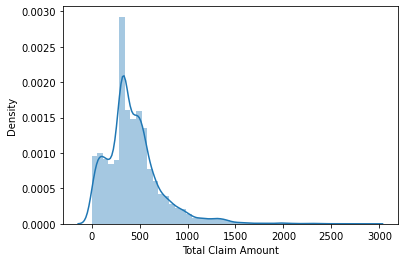

In [26]:
sns.distplot(df['Total Claim Amount'])

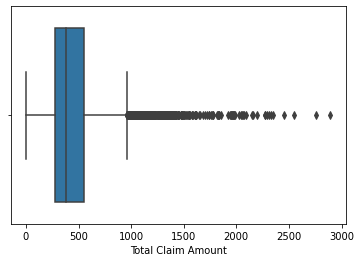

In [27]:
sns.boxplot(df['Total Claim Amount'])

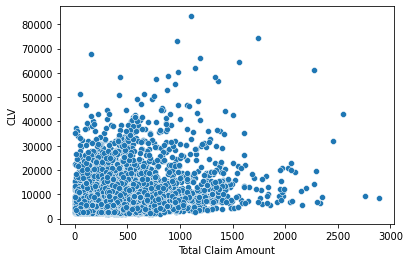

In [28]:
sns.scatterplot(df['Total Claim Amount'], df['CLV'])

 - From the above plot we can say that there is relationship between Total Claim Amount and CLV.

In [29]:
#create categorical variables
categorical_cols = df.select_dtypes(include= 'object')

In [30]:
no_cols = df[['Number of Open Complaints', 'Number of Policies']]

In [31]:
cat_cols = pd.concat([categorical_cols, no_cols], axis = 1)

In [32]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [33]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [34]:
cat_cols.drop("Effective To Date", axis = 1, inplace = True)

In [35]:
#Checking unique values in columns
for i in cat_cols:
  print("Unique values in",str(i),"is",df[i].nunique())
  print(df[i].value_counts())
  print("-----------------------------------------")

Unique values in Customer is 9134
SC43870    1
SI48717    1
SI88726    1
MY60905    1
TN79733    1
          ..
CS93971    1
DZ35379    1
PB60303    1
WG33213    1
XZ34917    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

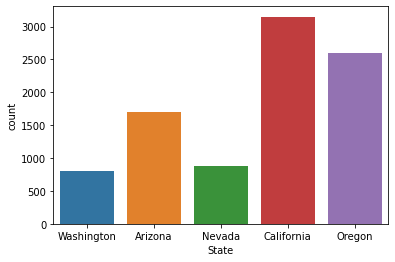

In [36]:
sns.countplot(df['State'])

 - Most number of people are residing in california.

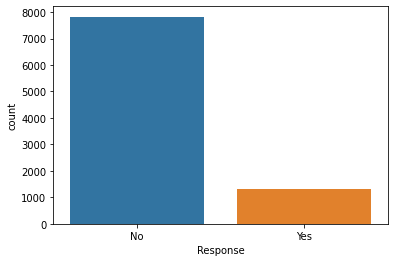

In [37]:
sns.countplot(df['Response'])

- Its seems that less than 1400 customers have responded to the marketing calls

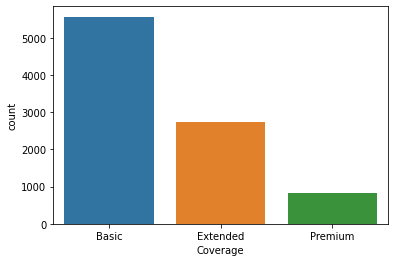

In [38]:
sns.countplot(df['Coverage'])

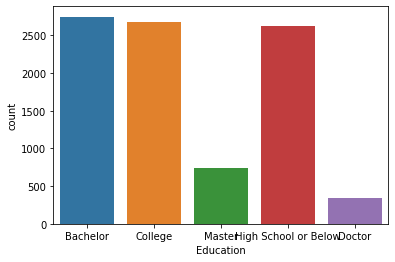

In [39]:
sns.countplot(df['Education'])

- From the above plot we can say that Most of the customers have either a bachelor or college degree

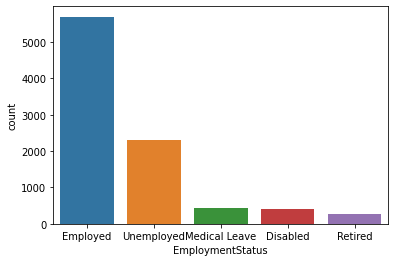

In [41]:
sns.countplot(df['EmploymentStatus'])

- More number of customers are employed.

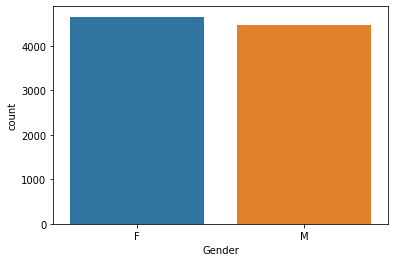

In [42]:
sns.countplot(df['Gender'])

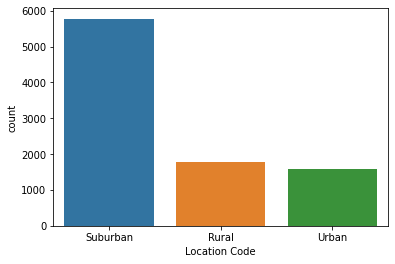

In [43]:
sns.countplot(df['Location Code'])

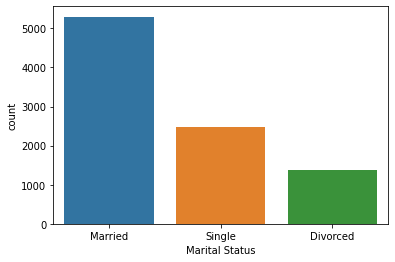

In [44]:
sns.countplot(df['Marital Status'])

- From the above plot we can say that more number of peoples are married.

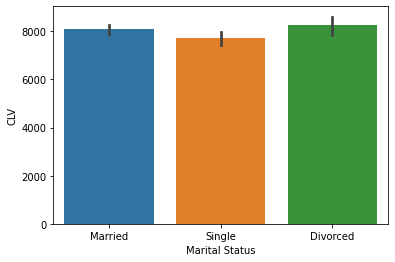

In [45]:
sns.barplot(df['Marital Status'], df['CLV'])

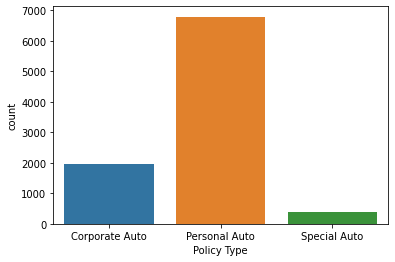

In [46]:
sns.countplot(df['Policy Type'])

 - We can observe that personal auto policy type are more in number.
 

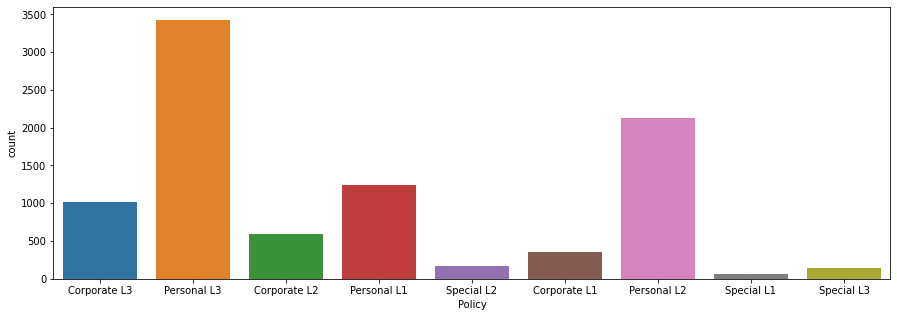

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(df['Policy'])

- Personal L3 policy subcategory has the most number of customers

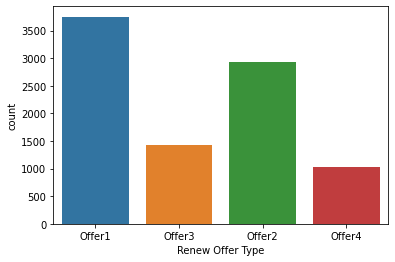

In [49]:
sns.countplot(df['Renew Offer Type'])

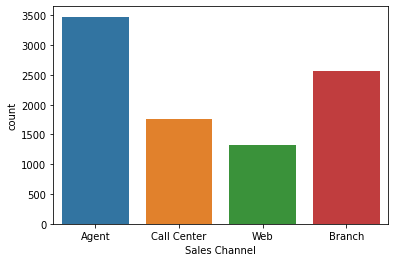

In [50]:
sns.countplot(df['Sales Channel'])

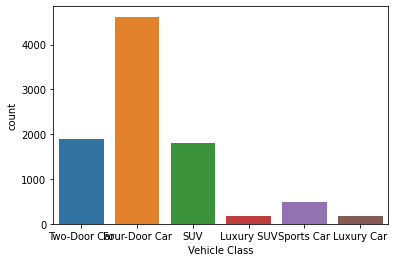

In [51]:
sns.countplot(df['Vehicle Class'])

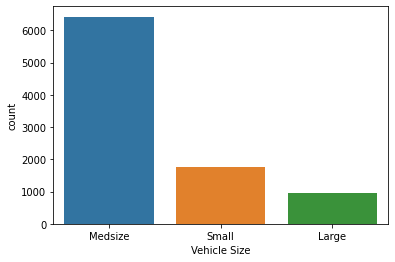

In [52]:
sns.countplot(df['Vehicle Size'])

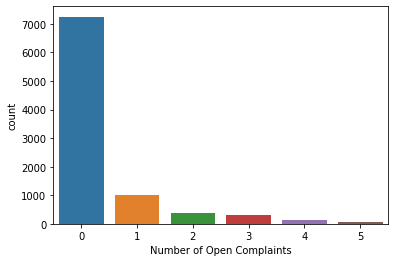

In [53]:
sns.countplot(df['Number of Open Complaints'])

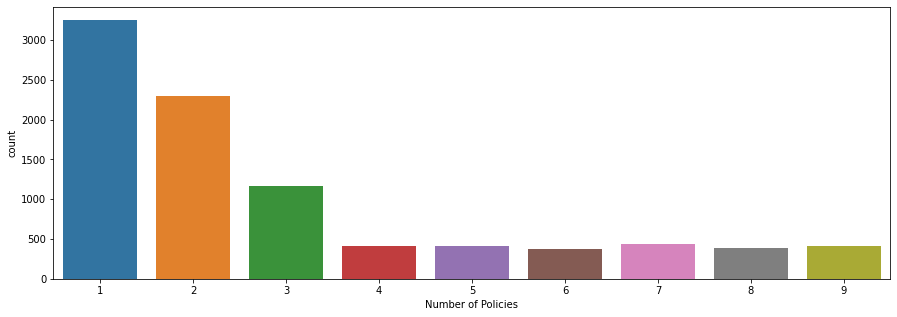

In [54]:
plt.figure(figsize = (15,5))
sns.countplot(df['Number of Policies'])

In [55]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], infer_datetime_format= True)

In [56]:
df['Months'] = df['Effective To Date'].dt.month

In [57]:
df['Months'] = df['Months'].astype('object')

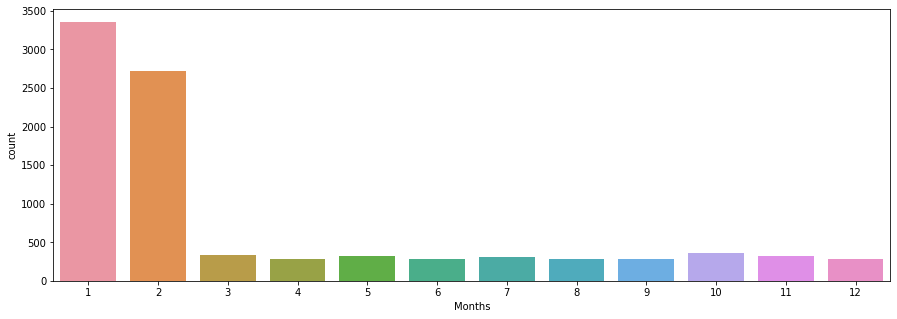

In [58]:
plt.figure(figsize = (15,5))
sns.countplot(df['Months'])

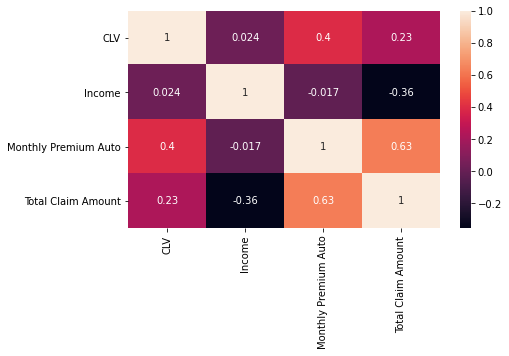

In [60]:
#Now create heatmap

heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

- We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto 

## Data Preprocessing

In [63]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [62]:
cat_cols.drop('Customer', axis = 1, inplace = True)

In [64]:
cat_dummies = pd.get_dummies(cat_cols, drop_first= True)

In [67]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [66]:
numerical_cols.drop(columns=['Number of Open Complaints', 'Number of Policies'], inplace= True)

In [68]:
data = pd.concat([numerical_cols, cat_dummies], axis = 1)

In [69]:
data.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
data.shape

(9134, 51)

### OLS Model

In [71]:
X = data.drop('CLV', axis = 1)
y = data['CLV']

In [74]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y, X_constant).fit()

In [75]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          6.92e-323
Time:                        04:59:45   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

Assumption - NO MULTI COLLINEARITY

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Total Claim Amount,4.396905
Number of Open Complaints,1.009196
Number of Policies,1.019460
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


- we can see that there is high VIF in column Policy & policy type Also we have seen in statistical approach these veriables are not significant to predict target hence from above 2 conclusion we can remove them


In [79]:

from sklearn.model_selection import train_test_split
X=data.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=data['CLV']  

In [80]:
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


### Model Building

 #### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.25484160264997946


In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [88]:

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.577231415348726
MAE 0.4455033282270872
R-squared: 0.25484160264997946


#### Ridge and Lasso Regression

In [90]:
from sklearn.linear_model import Ridge, Lasso

In [92]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 0.5775916080118745
R-squared: 0.25391135415166965


In [93]:
ridge=Ridge(alpha=1.0,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 0.5925342452447084
R-squared: 0.2148084953609083


In [94]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2668170587050659
MAE 0.10536932394383777
R-squared: 0.840787974934538


In [97]:
X_train.columns

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Total Claim Amount',
       'Number of Open Complaints', 'Number of Policies', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington', 'Response_Yes',
       'Coverage_Extended', 'Coverage_Premium', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_M', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Married',
       'Marital Status_Single', 'Policy_Corporate L2', 'Policy_Corporate L3',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV',
       'Vehic

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))


RMSE: 0.19615072746667536
MAE 0.08892265505040524
R-squared: 0.9139544276201418



Hyperparameter tuning of random forest

In [100]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [101]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [103]:
grid.best_score_

0.9113420772585495

In [104]:

rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19681618809920656
MAE 0.08944918789516049
R-squared: 0.9133696011272336


In [109]:
df_feat = pd.DataFrame(rf.feature_importances_, index = X.columns, columns = ['Score']).sort_values('Score', ascending = False)

In [110]:
df_feat

,Score
Number of Policies,0.672579
Monthly Premium Auto,0.232257
Total Claim Amount,0.014057
Income,0.012604
Months Since Last Claim,0.012384
Months Since Policy Inception,0.012313
Number of Open Complaints,0.003344
Coverage_Extended,0.002995
EmploymentStatus_Employed,0.002809
Renew Offer Type_Offer2,0.002032


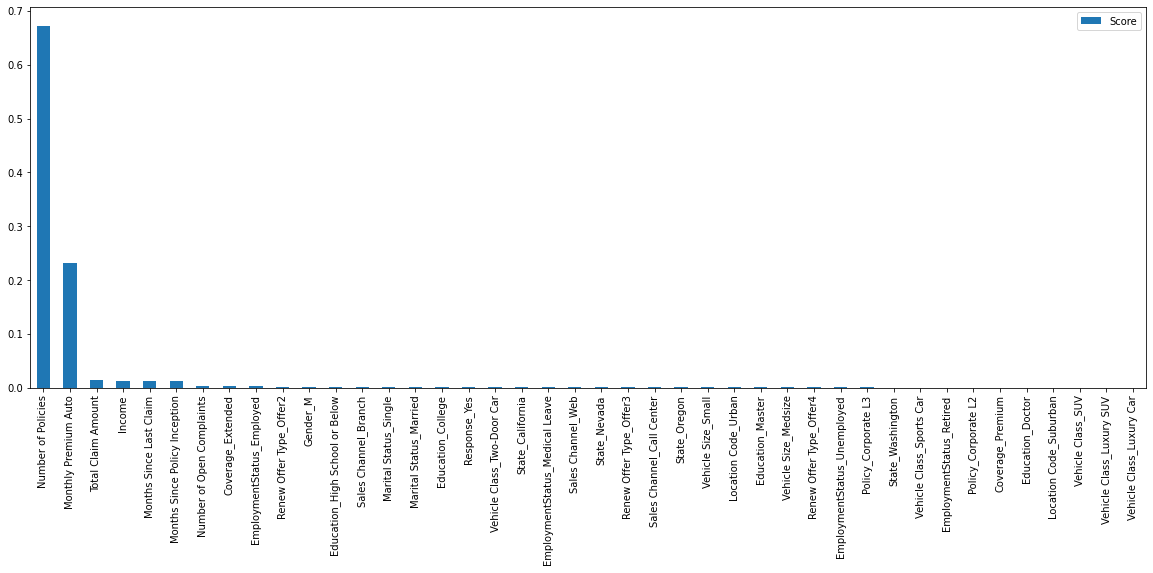

In [111]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

- 
Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score.
- No of Policies and Monthly Premium are the most important features in predicting CLV